In [39]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [22]:
# Load the data into a DataFrame
df = pd.read_csv('/content/INFY.csv', index_col='Date', parse_dates=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-03-11,1.167969,1.562500,1.167969,1.464844,1.150338,86256000
1999-03-12,1.468750,1.523438,1.343750,1.457031,1.144202,19948800
1999-03-15,1.460938,1.460938,1.316406,1.324219,1.039905,6336000
1999-03-16,1.335938,1.382813,1.312500,1.312500,1.030702,4992000
1999-03-17,1.312500,1.398438,1.304688,1.320313,1.036838,7724800
...,...,...,...,...,...,...
2017-07-24,15.720000,15.800000,15.650000,15.680000,15.680000,4577900
2017-07-25,15.740000,15.860000,15.680000,15.810000,15.810000,5431500
2017-07-26,15.800000,15.930000,15.780000,15.910000,15.910000,3419200


In [21]:
# Create a new DataFrame with just the Close column
data = df[['Close']]
data

,Close
Date,
1999-03-11,1.464844
1999-03-12,1.457031
1999-03-15,1.324219
1999-03-16,1.312500
1999-03-17,1.320313
...,...
2017-07-24,15.680000
2017-07-25,15.810000
2017-07-26,15.910000


In [23]:
# Create a new column for lagged values of Close
data['Lagged_Close'] = data['Close'].shift(1)
data

,Close,Lagged_Close
Date,,
1999-03-11,1.464844,NaN
1999-03-12,1.457031,1.464844
1999-03-15,1.324219,1.457031
1999-03-16,1.312500,1.324219
1999-03-17,1.320313,1.312500
...,...,...
2017-07-24,15.680000,15.680000
2017-07-25,15.810000,15.680000
2017-07-26,15.910000,15.810000


In [33]:
# Drop missing values
data.dropna(inplace=True)

In [34]:
# Split the data into training and testing sets
train_data = data[:-100]
test_data = data[-100:]
print(train_data.shape)
print(test_data.shape)

(4526, 2)
(100, 2)


In [35]:
# Fit a linear regression model to the training set
model = LinearRegression().fit(train_data[['Lagged_Close']], train_data[['Close']])


In [36]:
# Make predictions on the testing set
predictions = model.predict(test_data[['Lagged_Close']])

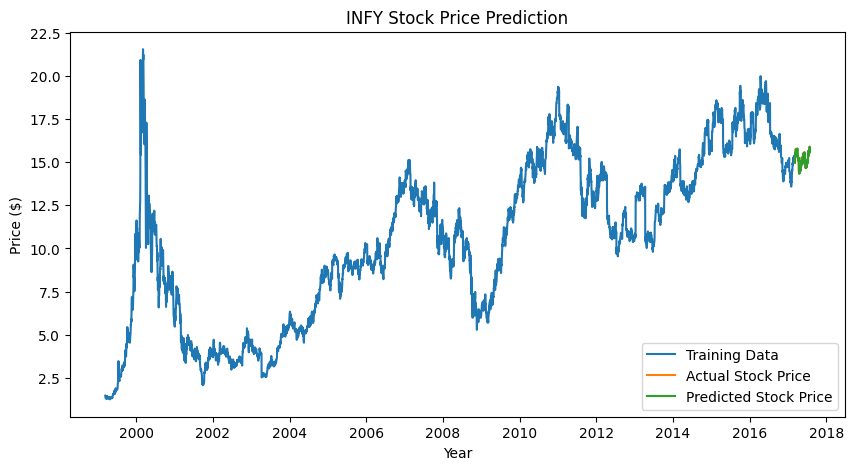

In [37]:
# Plot the actual and predicted stock prices
plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Actual Stock Price')
plt.plot(test_data.index, predictions, label='Predicted Stock Price')
plt.legend()
plt.title('INFY Stock Price Prediction')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.show()

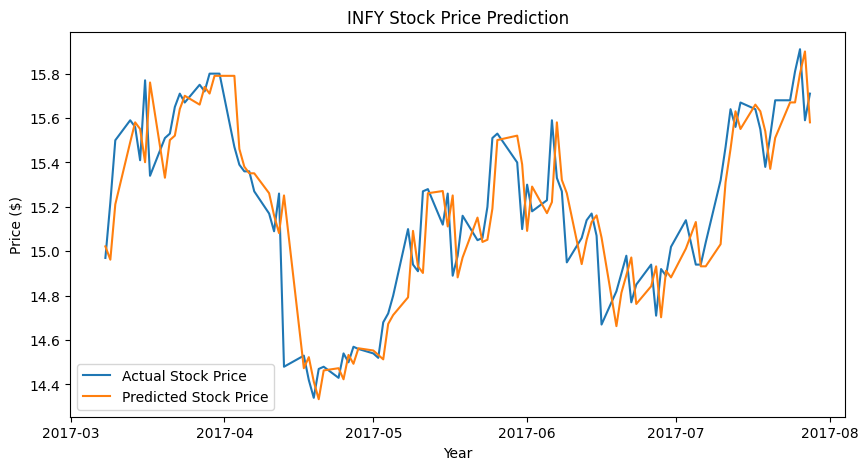

In [32]:
predictions = pd.DataFrame(index=test_data.index, columns=['Close'])
predictions['Close'] = model.predict(test_data[['Lagged_Close']])
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data['Close'], label='Actual Stock Price')
plt.plot(predictions.index, predictions['Close'], label='Predicted Stock Price')
plt.legend()
plt.title('INFY Stock Price Prediction')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.show()

In [20]:
# Calculate R-squared score
r2score = r2_score(test_data[['Close']], predictions)
print('R-squared score:', r2score)

R-squared score: 0.7919606087780591
